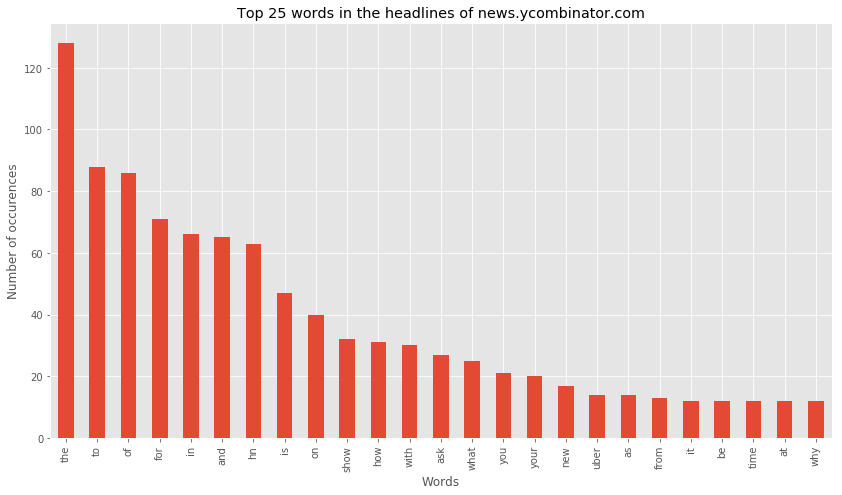

In [3]:
import requests
import datetime 
import time
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from matplotlib import style
import os
import shutil
import re

style.use('ggplot')


def goPandas(word_list):
    """
    Function used to pass the list, using pandas make it into a Series object, which sorts them in descending order and plotting it into a bar chart
    """
    
    S = pd.Series(word_list).value_counts().sort_values(ascending = False).head(25)
    
    plt.figure(figsize = (14, 8))
    plt.title('Top 25 words in the headlines of news.ycombinator.com')
    plt.subplots_adjust(bottom = 0.16)
    plt.xlabel('Words'); plt.ylabel('Number of occurences'); S.plot(kind='bar'); 
    #plt.savefig('new-data.png')
    plt.show()
    #os.mkdir('Images-over-time')
    #shutil.move('new-data.png','Images-over-time/new-data.png')
    #str(datetime.datetime.fromtimestamp(time.time()))+'.png'
    
def scramble(url):
    """
    Scraping the headlines of first twenty pages.
    """
    
    #Getting the source code of the html document as text and not as byte code
    html = requests.get(url).text
    bsObj = BeautifulSoup(html,'lxml')

    #Observing the source code of ycombinator news site, all the headlines belonged to the 'a' tag with class="storylink"
    for topics in bsObj.findAll('a',{'class':'storylink'}):
        headline = topics.get_text().lower().split()
        for eachWord in headline:
                word_list.append(eachWord)
                


def clean_filter(word_list):
    """
    Function to remove the unnecessary special characters from the words such as ", : etc 
    and if there are empty elements in the list '' remove them as well.
    """
    
    def check_each_character(i):
        """
        Function to check whether the word has any special characters or not
        if yes,it's replaced with ''
        """
        return re.sub('[,./<>?;\':"\[\]{}|`~\-_=+)(*&^%$#@!]', '', i)

    word_list = list(map(check_each_character, word_list))
    clean_list = [ eachWord for eachWord in word_list if len(eachWord) > 1]
    return clean_list


if __name__ == '__main__':

    #List comprehension to fetch the first twenty web pages of new.ycombinator.com
    Top20 = ['https://news.ycombinator.com/news?p='+str(i) for i in range(1,21)]
    word_list = []
    for url in Top20:
        scramble(url)
    goPandas(clean_filter(word_list))

else:

    print('the file is borrowed!')

